#**Projeto SQL - EBAC**

#**Exploração e Análise de dados de crédito com SQL**

Com base nos dados da tabela crédito iremos efetuar a exploração e análise de ambos para extrair informações importantes... 

#**O que são e quais são os dados presentes na tabela:**

os dados possuem o objetivo de representar as informações de clientes de um banco e contam com as seguintes colunas:



*   idade = idade do cliente
*   sexo = sexo do cliente (F ou M)
*   dependentes = número de dependentes do cliente
*   escolaridade = nível de escolaridade do cliente
*   salario_anual = faixa salarial do cliente
*   tipo_cartao = tipo de cartão do cliente 
*   qtd_produtos = quantidade de produtos comprados nos últimos 12 meses 
*   iteracoes_12m = quantidade de iterações/transações nos últimos 12 meses
*   meses_inativo_12m = quantidade de meses que o cliente ficou inativo
*   limite_credito = limite de crédito do cliente
*   valor_transacoes_12m = valor das transações nos últimos 12 meses 
*   qtd_transacoes_12m = quantidade de transações dos últimos 12 meses








A tabela com estes dados será criada no ambiente do AWS ATHENA junto com a tabela credito presente no Bucket do AWS S3, disponibilizado no Github: https://github.com/LuizEduardo008/dados-sql-ebac-Data-Analist

#**1. Criação da tabela e algumas queries** 

**Para essa parte**, utilizaremos os mesmo dados do módulo 3.

As informações de **credito8.csv** estarão disponíveis no material de aula.

Siga os seguintes passos para criação da tabela (desconsidere caso você já tenha os dados no seu S3):

*  Crie uma pasta bucket transacoes no seu S3 e carregue o arquivo credito8.csv
*  Volta para o AWS Athena e execute o seguinte comando:

Criando a tabela externa default.credito que será utilizado no projeto, conectando com o localização dos dados credito8.csv 

In [ ]:
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
 `idade` int,
 `sexo` string,
 `dependentes` int,
 `escolaridade` string,
 `estado_civil` string,
 `salario_anual` string,
 `tipo_cartao` string,
 `qtd_produtos` bigint,
 `iteracoes_12m` int,
 `meses_inativo_12m` int,
 `limite_credito` float,
 `valor_transacoes_12m` float,
 `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
   'serialization.format' = ',',
   'field.delim' = ','
) LOCATION 's3://bucket-transacoes-projeto/'
TBLPROPERTIES ('has_encrypted_data'='false');

tabela criada no ambiente do AWS Athena...



---



#**Fase de Exploração dos dados:**

Importante ver com quais informações estamos lidando e compreender nossa matéria prima, portanto iremos a exploração dos dados.

Qual a quantidade de informações presentes em nossa base de dados ?

In [ ]:
SELECT * FROM credito;

> Resultado: temos 2554 linhas na tabela

ps.: A nossa base de dados possui muitas informações em sua visualização, por isso optamos por mostrar apenas uma fração dos dados até por que também existem limites computacionais e para fins de estudos é muito mais interessante.

In [ ]:
SELECT * FROM credito LIMIT 10;

**Como são os dados** 

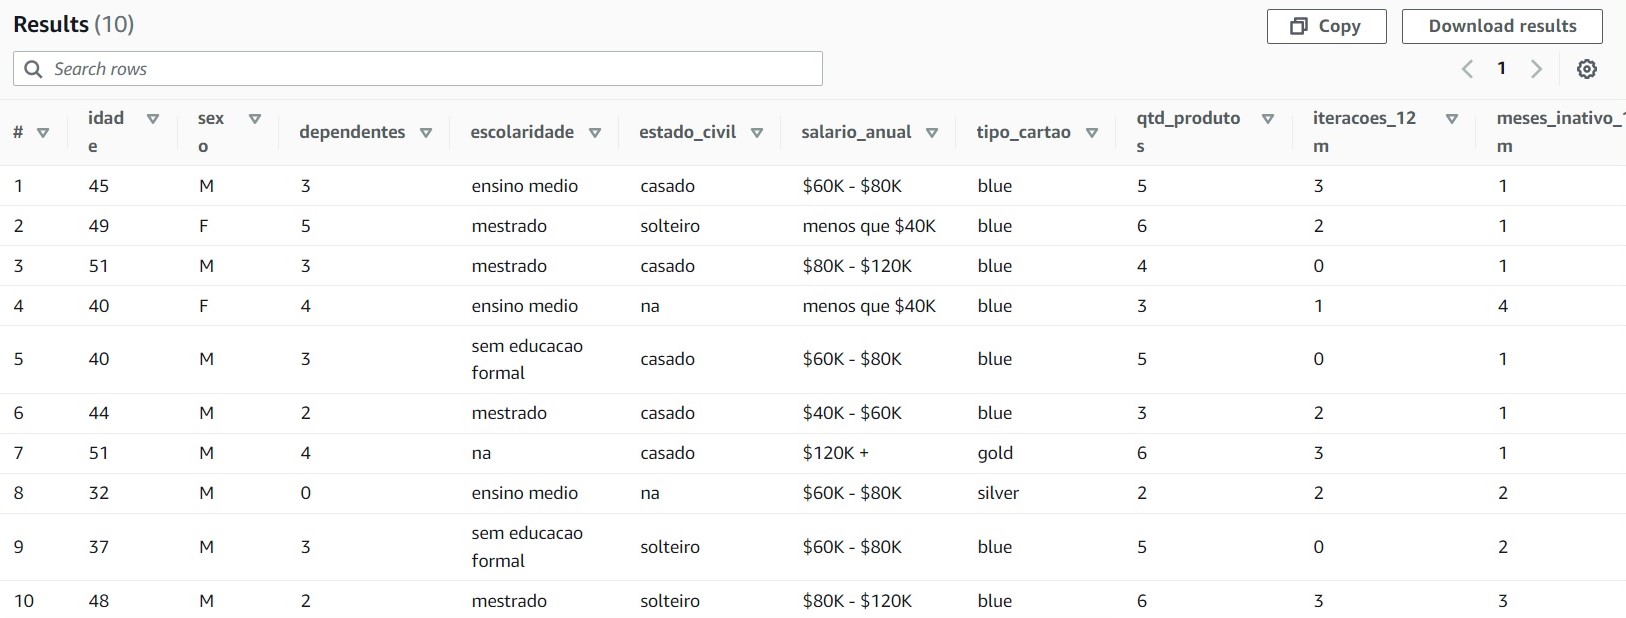

> Podemos reparar que existem informações nulas em alguns campos da tabela definidas pelo valor "na".



---



**Quais são os tipos de cada dado**

Para verificar e confirmar as colunas e seus tipos dos dados, utilizamos a função describe que basicamente descreve cada coluna da tabela credito quais os tipos de dados de cada coluna.

In [ ]:
DESCRIBE credito;

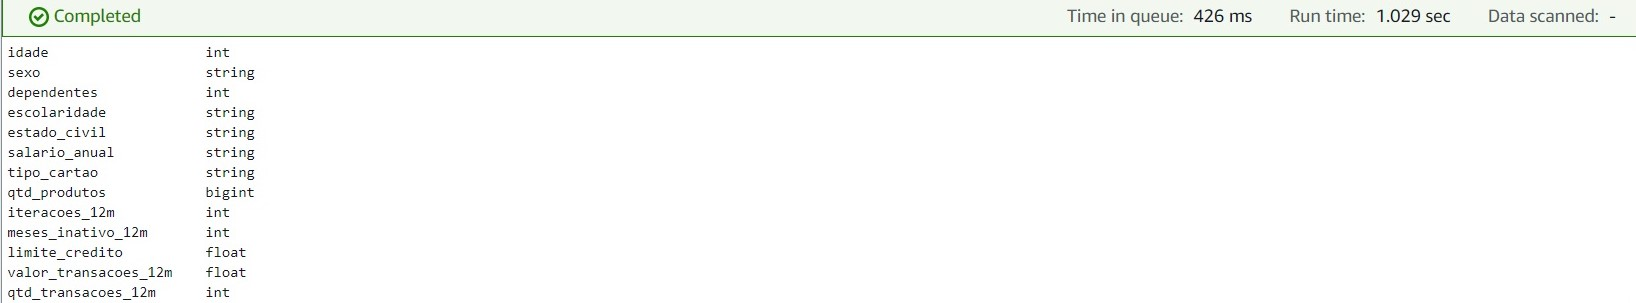

> Agora que já entendemos quais são os tipos dos dados, vamos olhar atentamente para as variáveis que não são numéricas...



---



**Quais são os níveis de escolaridade disponíveis**



Selecionamos a coluna escolaridade da tabela credito, com a função distinct que tem como objetivo eliminar repetições de dados nas consultas com o select, neste caso na coluna escolaridade.



In [ ]:
SELECT DISTINCT escolaridade FROM credito;

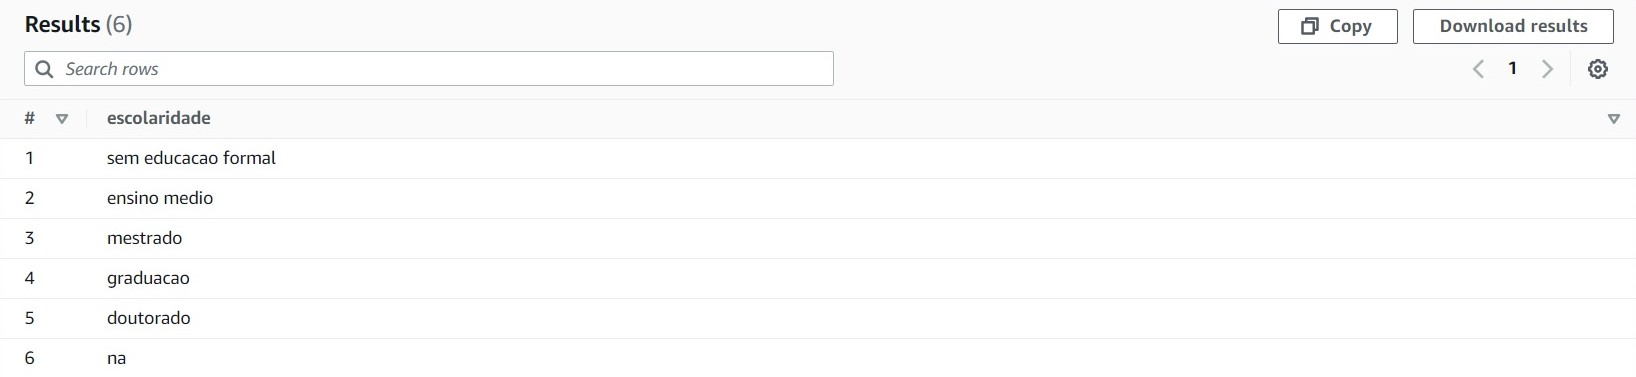

> Os dados contam com vários níveis de escolaridade e é possível perceber que temos valores nulos (na), trataremos mais tarde...



---



Será que teremos mais valores nulos ?

**Quais são os tipos de estado_civil disponíveis**

Selecionamos a coluna estado_civil da tabela credito, com a função distinct que tem como objetivo eliminar repetições de dados nas consultas com o select, neste caso na coluna estado_civil.

In [ ]:
SELECT DISTINCT estado_civil FROM credito;

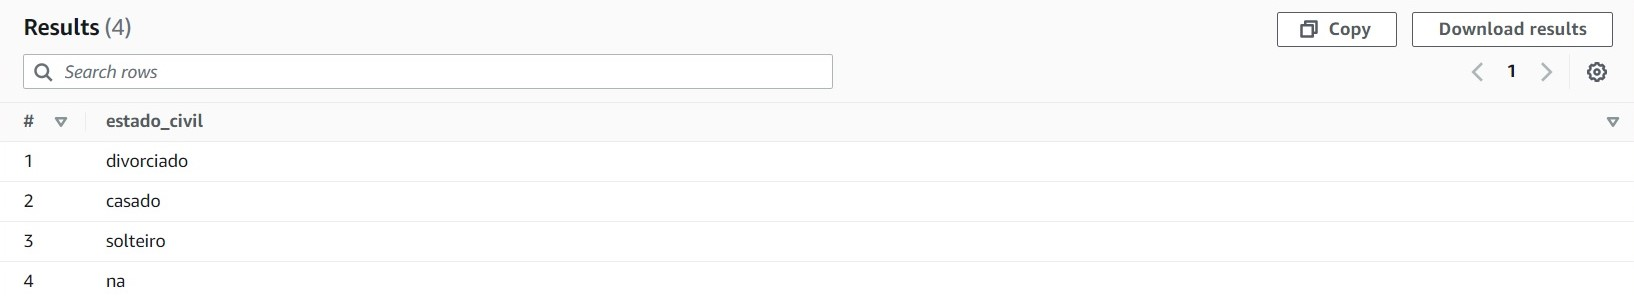

> Mais uma vez encontramos valores nulos na tabela dessa vez presente na coluna estado_civil



---



**Quais são os tipos de salario_anual disponíveis**

Selecionamos a coluna salario_anual da tabela credito, com a função distinct que tem como objetivo eliminar repetições de dados nas consultas com o select, neste caso na coluna salario_anual.

In [ ]:
SELECT DISTINCT salario_anual FROM credito;

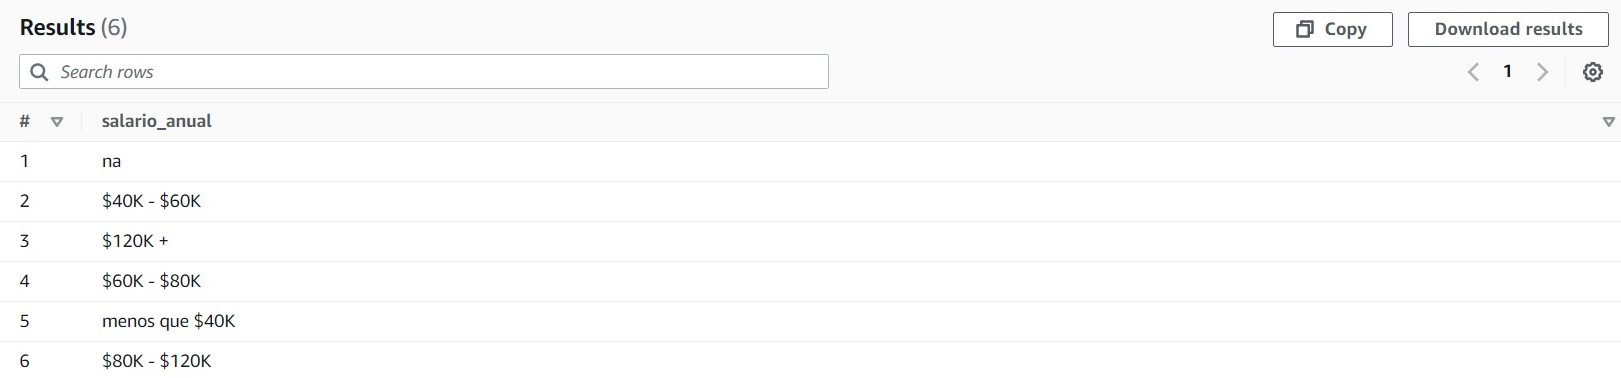

> É perceptível que os salários não estão em valores exatos do que o cliente ganha, mas sim em uma faixa salarial. Também foram encontrados valores nulos  



---



#**Fase de Análise dos dados:**

Após termos explorado os dados e compreendido quais são as informações que possuímos, podemos começar a analisar ambas as informações para entender o que está acontecendo no banco de dados, com isso faremos algumas perguntas...

**Quantos clientes temos em cada faixa salarial ?**

Utilizando a função count com select verificamos quantas pessoas ganham aquela média de salário anual e com a cláusula group by agrupamos os dados semelhantes.

In [ ]:
SELECT COUNT(*), salario_anual FROM credito GROUP BY salario_anual;

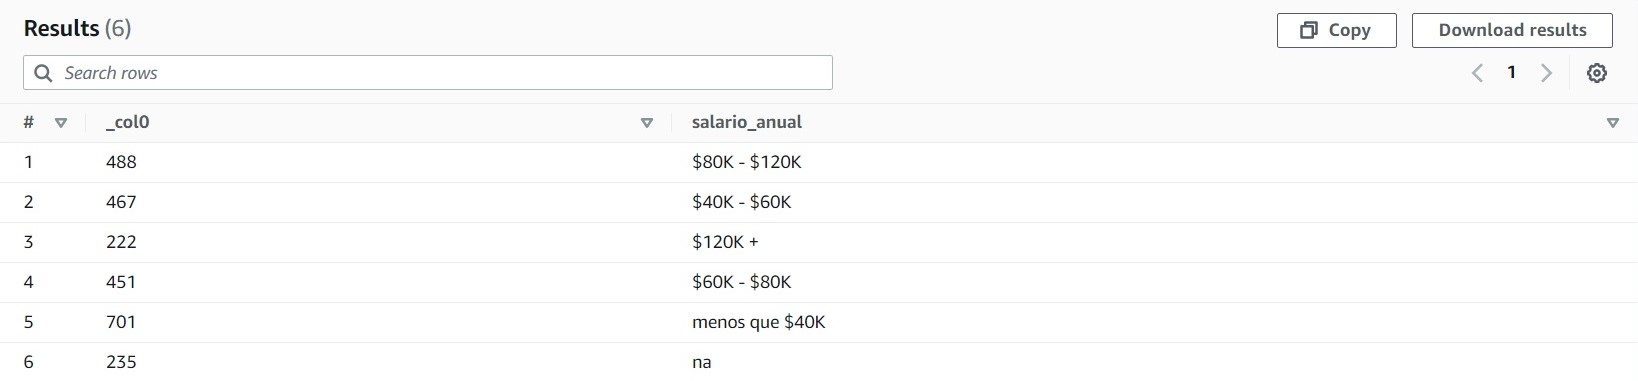

> A maioria dos clientes presentes na base de dados possui renda menor que $40k e 235 optaram por não informar quanto ganham ou a faixa salarial não consta no base de dados. Pensando no lado da empresa talvez seja interessante focar no público de baixa renda.  



---



**Quantos clientes são Homens e quantos são Mulheres ?**

Utilizando a função Count com Select verificamos quantos clientes do sexo feminino e masculino estão presentes na tabela credito com a cláusula group by que agrupa os dados semelhantes. 

In [ ]:
SELECT COUNT(*), sexo FROM credito GROUP BY sexo;

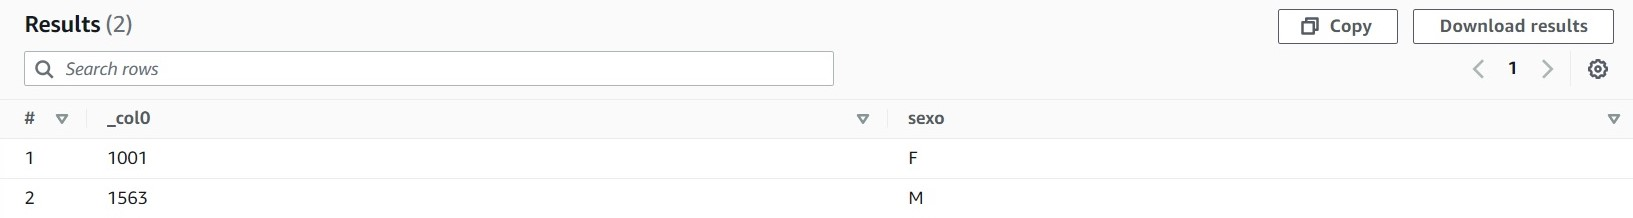

Para melhor visualizar a análise dos dados:

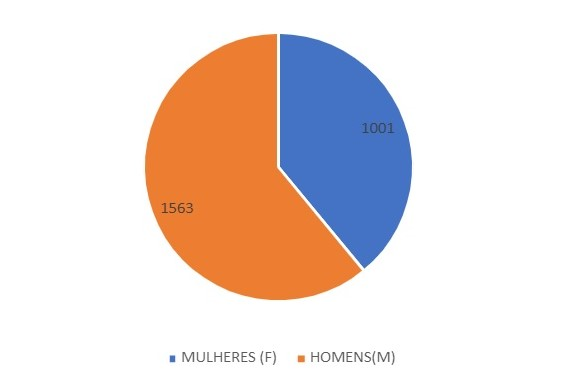

> A maioria dos clientes presentes na base de dados são do sexo Masculino, ou seja a maioria são Homens, do csv extraído dos dados é possível gerar o gráfico em pizza para verificar melhor a proporção de Homens e Mulheres...



---



**Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?**

Utilizando a função AVG  iremos tirar uma média de idade dos clientes trazendo sexo, idade mínima com a função MIN e Máxima com a função MAX, agrupados por sexo Feminino e Masculino para termos uma visualização mais organizada... 

In [ ]:
SELECT AVG(idade) AS media_idade, MIN(idade) as min_idade, MAX(idade) as
max_idade, sexo FROM credito 
GROUP BY sexo;

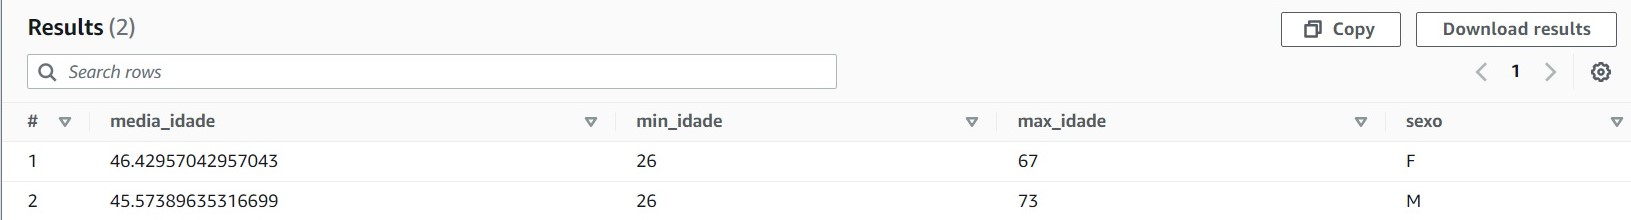

É perceptível que a faixa de idade não é tão gritante sendo muito similar em sua média...

> Por meio dessa análise não foi possível extrair nenhuma informação relevante. A menor idade dos dois sexos é a mesma e a média é muito similar. A unica diferença é a idade máxima mas fato quase irrelevante por a diferença não é tão gritante.



---



**Qual a maior e menor transação dos clientes?**

Utilizando a função MIN iremos puxar o valor mínimo das transações e também a função MAX pra puxar o valor máximo das transações. 

In [ ]:
SELECT MIN(valor_transacoes_12m) AS transacao_minima, MAX(valor_transacoes_12m) AS transacao_maxima 
FROM credito;

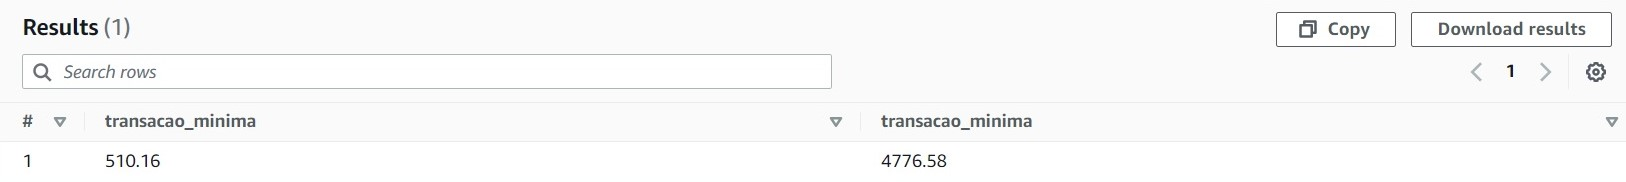

> Nesse banco de dados temos soma de transações em 12 meses variam de 510.16 a 4776.58



---



**Quais as características dos clientes que possuem os maiores creditos?**

Utilizando Select com a função Max e entre parentêses a coluna que queremos verificar os valores máximos com um apelido dado com AS, e é perceptível que podemos selecionar mais colunas normalmente.  

como estamos realizando essas operações com mais de uma coluna é importante utilizar uma cláusula Where para identificar as colunas e o que deve ser selecionado, logo em seguida agrupamos os dados de mais de uma coluna ordenados pela coluna limite_credito na ordem decrescente e limitando a apenas 10 linhas.

In [ ]:
SELECT MAX(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo FROM credito
WHERE escolaridade != 'na' AND tipo_cartao !='na'
GROUP BY escolaridade, tipo_cartao, sexo
ORDER BY limite_credito desc
LIMIT 10;

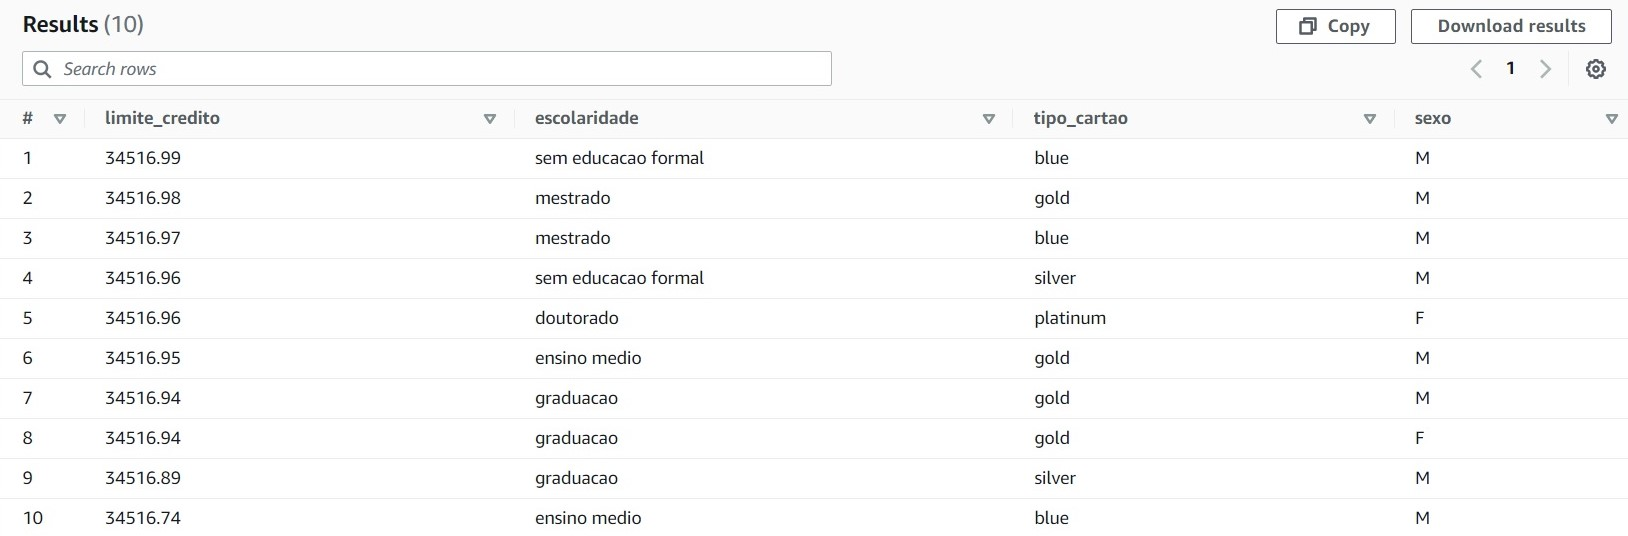

> Não parece haver um impacto da escolaridade no limite. O limite mais alto é oferecido para um homem sem educação formal. O cartão também parece não estar relacionado com a escolaridade nem com o limite. Dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue



---



**Quais as características dos clientes que possuem os menores creditos?**

Utilizando Select com a função Max e entre parentêses a coluna que queremos verificar os valores máximos com um apelido dado com AS, e é perceptível que podemos selecionar mais colunas normalmente.

como estamos realizando essas operações com mais de uma coluna é importante utilizar uma cláusula Where para identificar as colunas e o que deve ser selecionado, logo em seguida agrupamos os dados de mais de uma coluna ordenados pela coluna limite_credito na ordem crescente e limitando a apenas 10 linhas.

In [ ]:
SELECT MAX(limite_credito) AS limite_credito, escolaridade, tipo_cartao, sexo FROM credito
WHERE escolaridade != 'na' AND tipo_cartao !='na'
GROUP BY escolaridade, tipo_cartao, sexo
ORDER BY limite_credito asc
LIMIT 10;

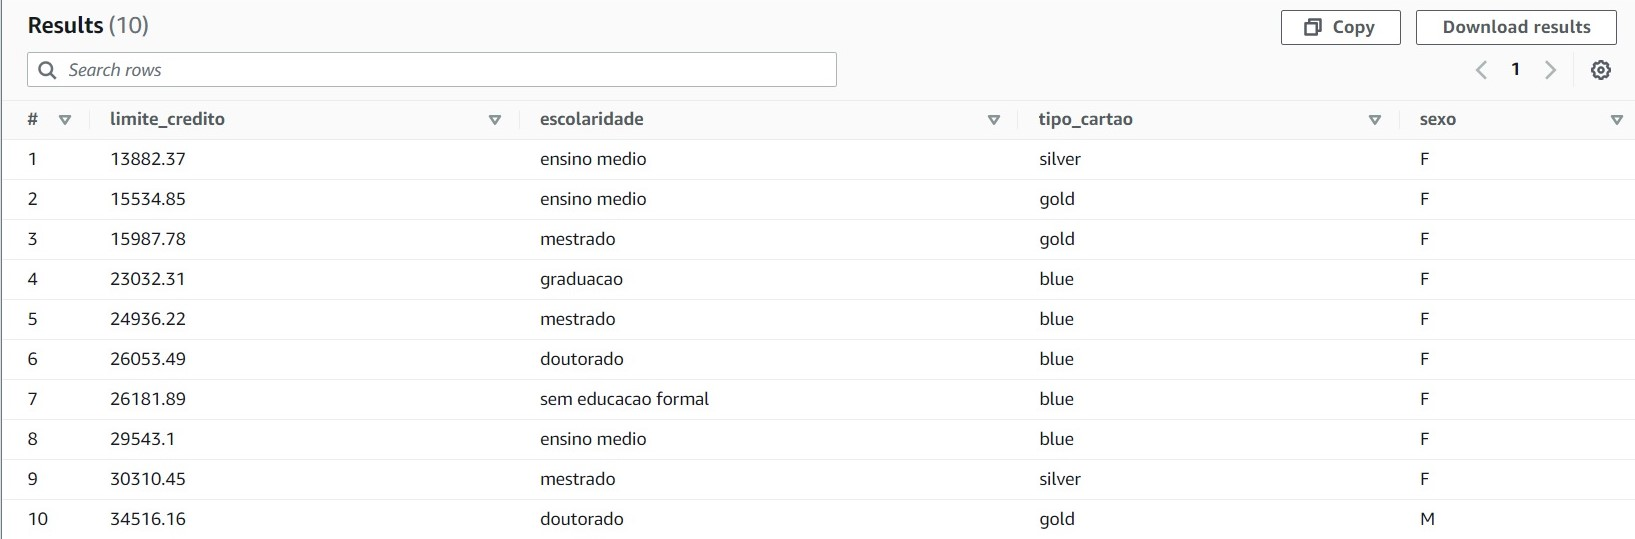

> Dessa vez conseguimos perceber que não há clientes com cartão platinum dentre os menores limites. Também foi possível perceber que a maioria dos menores limites são mulheres enquanto nos maiores limites predomina homens.



---



**Será que as mulheres gastam mais?**

Utilizando Select com a função Max e entre parentêses a coluna que queremos verificar os valores máximos com um apelido dado com AS, e é perceptível que podemos selecionar mais de uma coluna realizando outra função como neste caso a AVG que calcula a média e o AS do apelido.

In [ ]:
SELECT MAX(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo 
from credito 
group by sexo;

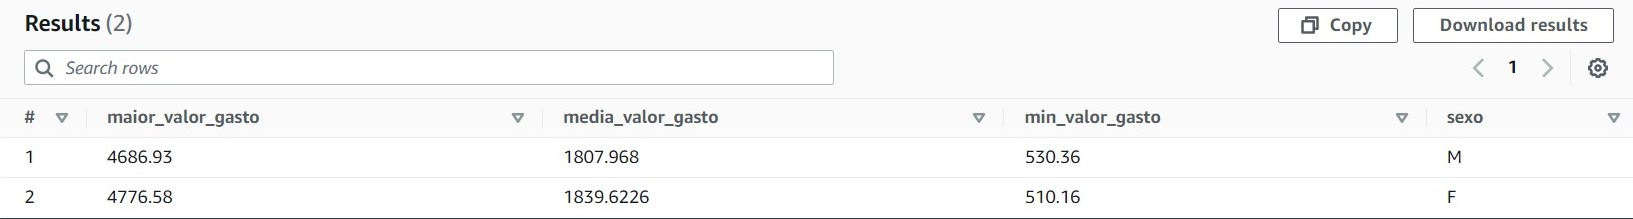

> Apesar da diferença nos limites, os gastos de homens e mulheres são quase similares!



---



**O salário impacta no limite?**

Nesta consulta temos somente as colunas com cálculo de média, utilizando um Select com AVG que funciona para calcular médias, dando apelido com AS as colunas que foram calculadas.

logo em seguida temos a cláusula WHERE indicando que deve selecionar somente dados diferentes de 'na', ou seja que não forem nulos, agrupados pelas colunas sexo e salario_anual e ordenandos pela média da coluna valor_transacoes_12m em ordem descrescente. 

In [ ]:
SELECT AVG(qtd_produtos) AS qts_produtos, AVG(valor_transacoes_12m) AS media_valor_transacoes, AVG(limite_credito) AS limite_credito
FROM credito
WHERE salario_anual != 'na'
GROUP BY sexo, salario_anual
ORDER BY AVG(valor_transacoes_12m) DESC;

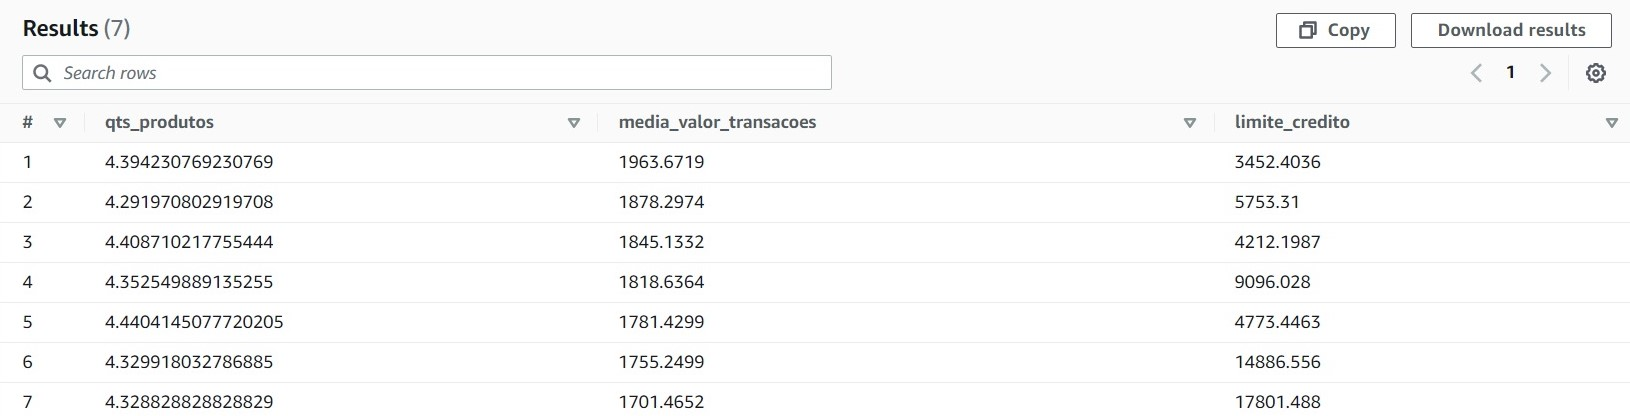

> Sim com toda certeza o salário impacta no limite de crédito. No caso da base de dados analisada as pessoas que tem menor faixa salarial consequentemente também apresentam menor limite de credito no cartão.



---



**Quantos cartões de cada tipo temos ?**

Utilizando a função Count na coluna tipo_cartao da tabela credito, 
podemos verificar com os dados semelhantes agrupados com Group By quantos cartões de cada tipo existem na tabela....

In [ ]:
SELECT COUNT(*), tipo_cartao 
FROM credito 
GROUP BY tipo_cartao;

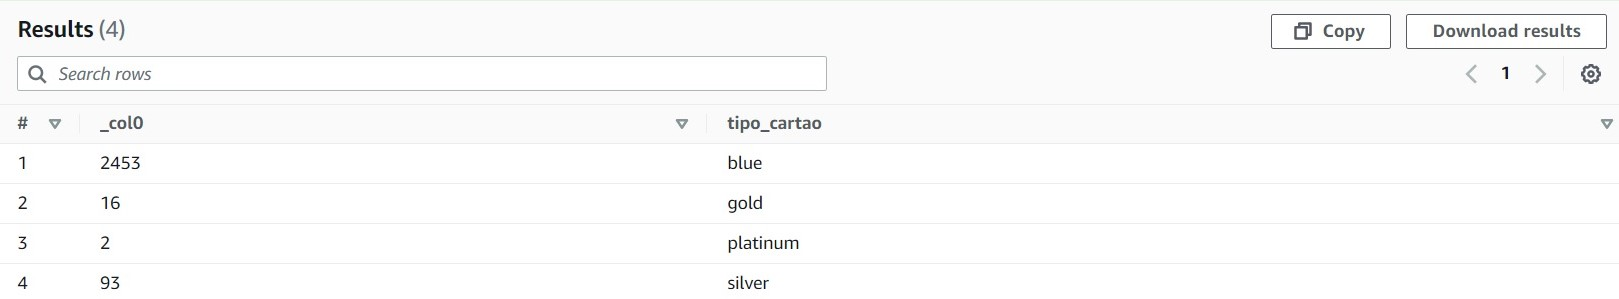

> É perceptível que poucas pessoas possuem os cartões Gold Platinum, o tipo Blue é o mais comum entre as pessoas assim como o Silver.



---



**Quantas pessoas tem cartão Gold por escolaridade ?**

Utilizando a função Count na coluna escolaridade da tabela credito, podemos verificar com os dados semelhantes agrupados com Group By quantos cartões do tipo Gold existem na tabela por escolaridade....

In [ ]:
SELECT COUNT(*), escolaridade
FROM credito
WHERE tipo_cartao = 'gold'
GROUP BY escolaridade;

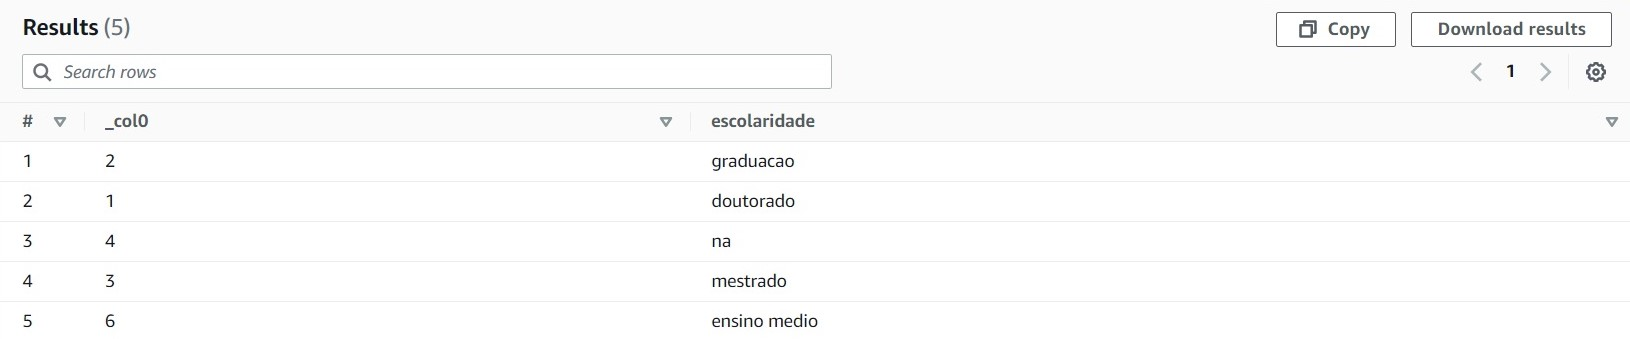

> É perceptível que pessoas com somente o ensino médio optaram pelo cartão do tipo Gold



---



**Quantas pessoas tem cartão Platinum por escolaridade ?**

Utilizando a função Count na coluna escolaridade da tabela credito, podemos verificar com os dados semelhantes agrupados com Group By quantos cartões do tipo Platinum existem na tabela por escolaridade....

In [ ]:
SELECT COUNT(*), escolaridade
FROM credito
WHERE tipo_cartao = 'platinum'
GROUP BY escolaridade;

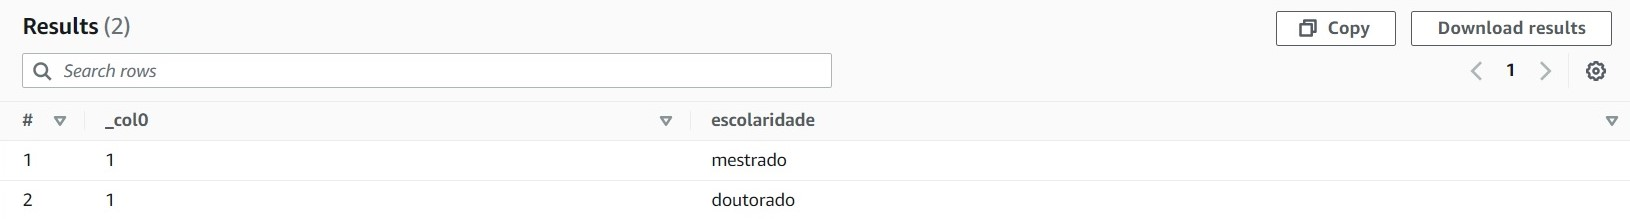

> É perceptível que o cartão Platinum não é tão comum sendo pessoas com escolaridade mais alta os principais usuários mas ainda sim são poucas as pessoas que optaram por esse tipo de cartão.



---



**Quantas pessoas tem cartão BLUE por escolaridade ?**

Utilizando a função Count na coluna escolaridade da tabela credito, podemos verificar com os dados semelhantes agrupados com Group By quantos cartões do tipo Blue existem na tabela por escolaridade....

In [ ]:
SELECT COUNT(*), escolaridade
FROM credito
WHERE tipo_cartao = 'blue'
GROUP BY escolaridade;

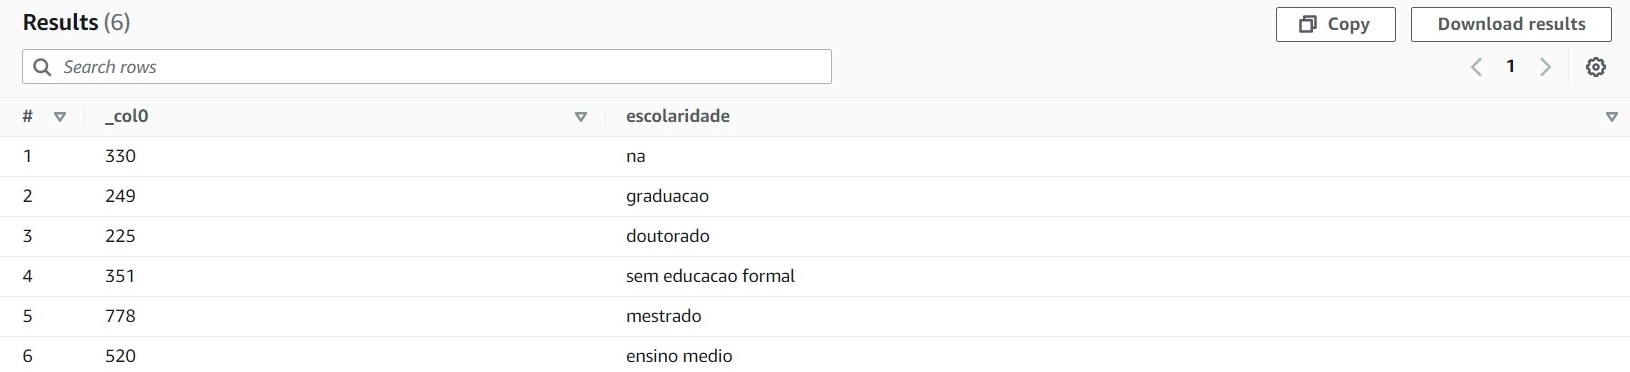

> É perceptível que o cartão Blue é o mais optado pelas pessoas independente da escolaridade mas muito mais comum em pessoas com Mestrado.



---



**Quantas pessoas tem cartão Silver por escolaridade ?**

Utilizando a função Count na coluna escolaridade da tabela credito, podemos verificar com os dados semelhantes agrupados com Group By quantos cartões do tipo Silver existem na tabela por escolaridade....

In [ ]:
SELECT COUNT(*), escolaridade
FROM credito
WHERE tipo_cartao = 'silver' 
GROUP BY escolaridade;

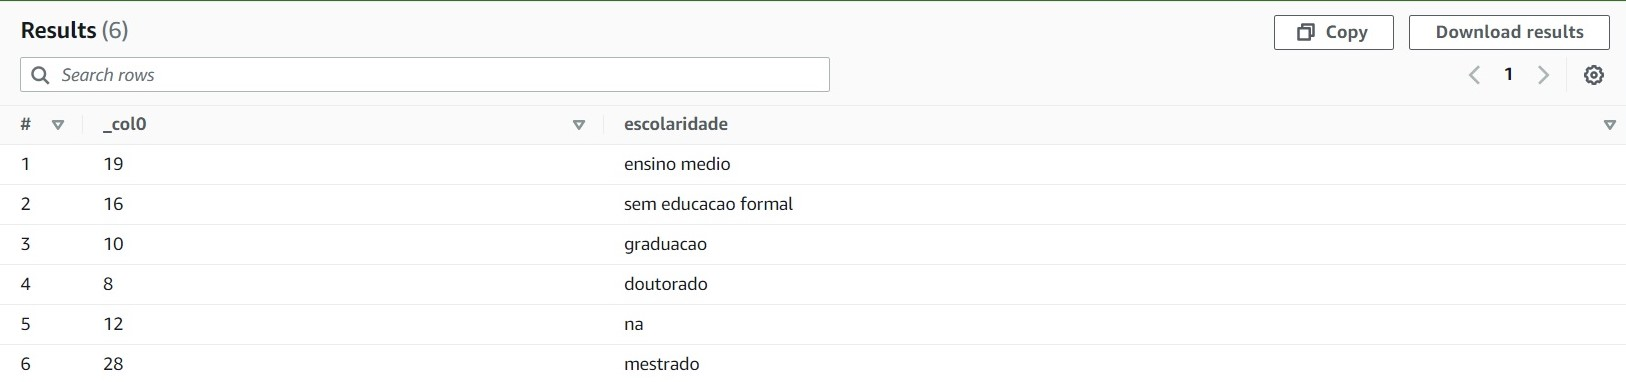

> É perceptível que o cartão Silver assim como o Blue é um dos mais escolhidos pelas pessoas e mais uma vez optado mais comumente por pessoas com Mestrado.



---



**Quantas pessoas acima dos 40 anos possuem algum dos níveis de escolaridade ?**

Utilizando a função Count na coluna escolaridade iremos verificar a quantidade de pessoas com os níveis de escolaridade na tabela credito, localizando o tipo de informação que queremos de acordo com a idade maior que 40 aplicando a função AND PARA mencionar outra tabela sem escolaridade "nula" agrupados com Group By para não termos dados repetidos e sim somados em um...

In [ ]:
SELECT COUNT(*), escolaridade
FROM credito
WHERE idade > 40 AND escolaridade != 'na'   
GROUP BY escolaridade;

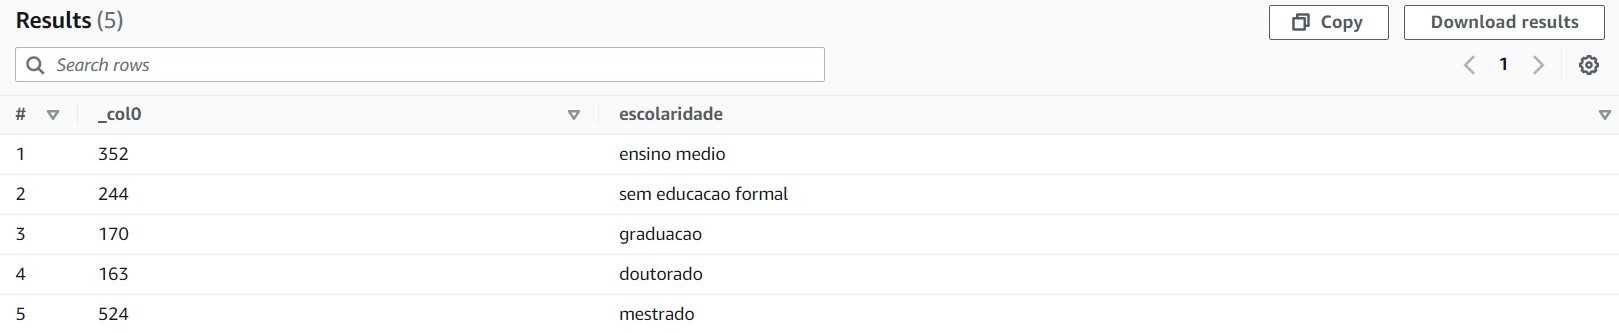

> É perceptível que ao mesmo tempo que temos um número alto de pessoas com educação formal completa no ensino médio e ensino superior como mestrado e graduação, temos muitas pessoas acima dos 40 sem educação formal...



---



**Quantas pessoas acima dos 40 anos possuem uma média de salário anual entre 80k e 120k ?**

Utilizando a função Count na coluna salario_anual iremos verificar a quantidade de pessoas que ganham a média de 80k e 120k por ano na tabela credito, localizando o tipo de informação que queremos de acordo com a idade maior que 40 aplicando a função AND PARA mencionar outra tabela salario_anual na faixa de valores agrupados com Group By para não termos dados repetidos e sim somados em um...

In [ ]:
SELECT COUNT(*), salario_anual
FROM credito
WHERE idade > 40 AND salario_anual = '$80K - $120K'
GROUP BY salario_anual; 

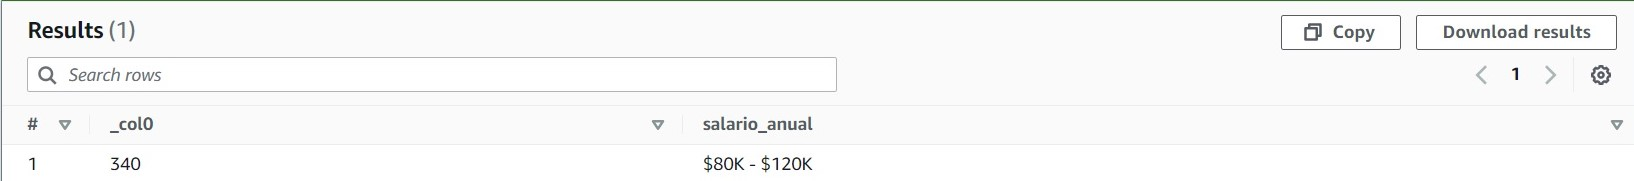

> É perceptível que pessoas acima dos 40 anos tem uma quantidade até que alta de pessoas que ganham na faixa de 80 a 120 mil por ano cerca de 340 clientes.



---



**Quantas pessoas abaixo dos 40 possuem uma média de salário anual entre 80k e 120k ?**

Utilizando a função Count na coluna salario_anual iremos verificar a quantidade de pessoas que ganham a média de 80k e 120k por ano na tabela credito, localizando o tipo de informação que queremos de acordo com a idade menor que 40 aplicando a função AND PARA mencionar outra tabela salario_anual na faixa de valores agrupados com Group By para não termos dados repetidos e sim somados em um...

In [ ]:
SELECT COUNT(*), salario_anual
FROM credito
WHERE idade < 40 AND salario_anual = '$80K - $120K'
GROUP BY salario_anual; 

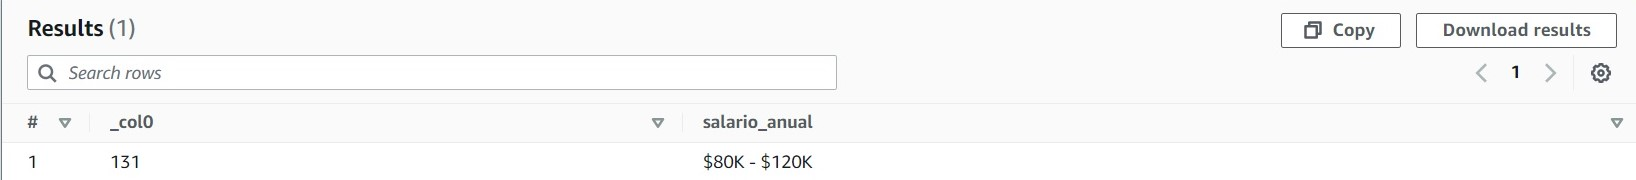

> É perceptível que pessoas abaixo dos 40 anos tem uma quantidade bem baixa de pessoas que ganham na faixa de 80 a 120 mil por ano cerca de 131 clientes apenas.



---



# **Conclusão**

Essas foram **algumas** análises extraídas do dataset de crédito. 

Alguns insights interessantes:

*   a maior parte dos clientes possui renda até 40K
*   a maior parte dos clientes é masculino!
*   a escolaridade não parece influenciar no limite nem no tipo do cartão
*   os clientes com maiores limites são em sua maioria homens
*   os clientes com menores limites são em sua maioria mulheres
*   dentre os menores limites não há presença de cartão platinum
*   a faixa salarial impacta diretamente no limite de crédito
*   nao existem clientes com salário anual acima de 60K do sexo feminino
*   o cartao blue é o mais comum sendo utilizado por 2453 clientes
*   o cartao blue é muito mais comum entre pessoas com Mestrado sendo 778 clientes
*   o cartao silver é um dos mais comuns também sendo utilizado por 93 clientes
*   o cartao silver é muito mais comum entre pessoas com Mestrado sendo 28 clientes
*   O cartao do tipo platinum não é muito comun tendo apenas 2 clientes
*   já o gold tem apenas 16 pessoas a maioria com apenas ensino médio
*   Cerca de 244 clientes acima dos 40 não possuem algum nível de escolridade 
*   Cerca de 352 clientes acima dos 40 possuem ao menos ensino médio 
*   Cerca de 857 clientes acima dos 40 possuem os níveis superiores de escolaridade
*   É bem mais comum pessoas acima dos 40 ganharem uma média de salário anual entre 80 e 120k, cerca 340 clientes ganham entre esses valores
*   Pessoas abaixo dos 40 é menos comum ganharem uma média de salário anual entre 80 e 120k, cerca de 131 clientes ganham entre esses valores

















**Uma exploração maior dos dados pode explicar porque as mulheres tem menor crédito. Isso também pode ser um problema cultural que pode ser repensado!**